# WDM CASE:

In [1]:
from subhalos_WDM_new import *

m_wdm   = 1.5             # [keV]
Mhost_0 = 1e12            # Host halo mass at redshift = 0 [Msolar]

sh      = subhalos(m_wdm)

Mass distribution comparison between the model with and without spatial informations:

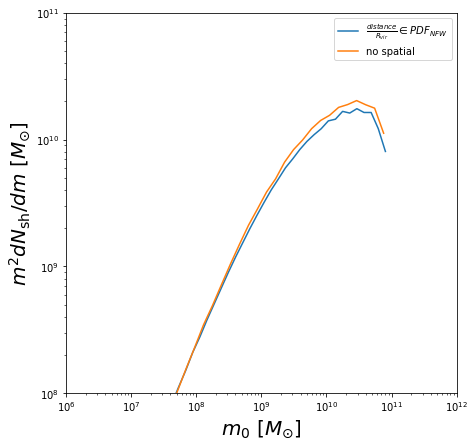

In [21]:
m, dNdm = sh.subhalo_distr(Mhost_0)
m_new, dNdm_new = sh.subhalo_distr_new(Mhost_0,mmodel=3)

plt.figure(figsize=(7,7))
plt.loglog(m_new,m_new**2*dNdm_new)
plt.loglog(m,m**2*dNdm)
plt.xlim(1e6,1e12)
plt.ylim(1e8,1e11)
plt.xlabel(r'$m_0$ [$M_{\odot}$]',fontsize=20)
plt.ylabel(r'$m^{2} dN_{\rm sh}/dm$ [$M_{\odot}$]',fontsize=20)
plt.legend([r'$\frac{distance}{R_{vir}} \in PDF_{NFW}$','no spatial'])
#plt.savefig('wdm_model_3_mass_dist_comp.png')
plt.show()


Comparison of satellites' cumulative distribution of the subhalo mass function between the model with and without spatial information:

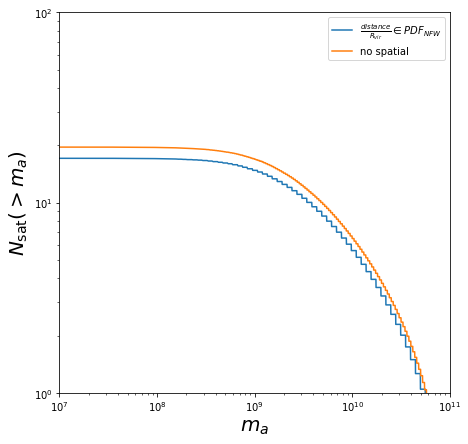

Total number of satellites (no spatial information) =  19
Total number of satellites (with spatial information) =  17


In [20]:
Nsat_new, x_new, y_new = sh.N_sat_new(Mhost_0, redshift=0.0, dz=0.3, zmax=7.0, N_ma=100, N_herm=5, \
 logmamin=6, sigmafac=0,N_hermNa=200,profile_change=True,N_r=5,rmin=0.01,rmax=0.99,mmodel=3)
Nsat, x, y = sh.N_sat(Mhost_0)

plt.figure(figsize=(7,7))
plt.loglog(x_new,y_new)
plt.loglog(x,y)

plt.xlim(1e7,1e11)
plt.ylim(1,1e2)
plt.xlabel(r'$m_a$',fontsize=20)
plt.ylabel(r'$N_{\rm sat}(>m_a)$',fontsize=20)
plt.legend([r'$\frac{distance}{R_{vir}} \in PDF_{NFW}$','no spatial'])
#plt.savefig('wdm_model_3_sat_dist_m_comp.png')
plt.show()

print("Total number of satellites (no spatial information) = ", int(Nsat))
print("Total number of satellites (with spatial information) = ", int(Nsat_new))


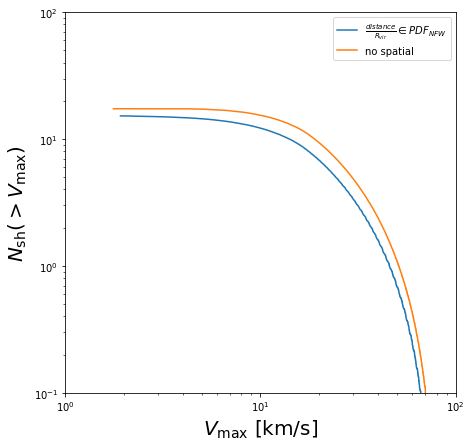

Total number of satellites (no spatial information) =  19
Total number of satellites (with spatial information) =  17


In [19]:
Vpeak = 18 # km/s
Nsat_new2, x_new2, y_new2 = sh.N_sat_Vthres_new(Mhost_0, Vpeak, redshift=0.0, dz=0.3, zmax=7.0, N_ma=100, \
    N_herm=5,logmamin=6, sigmafac=0,N_hermNa=200,profile_change=True,N_r=5,rmin=0.01,rmax=0.99,mmodel=3)

Nsat2, x2, y2 = sh.N_sat_Vthres(Mhost_0, Vpeak)

plt.figure(figsize=(7,7))
plt.loglog(x_new2,y_new2)
plt.loglog(x2,y2)
plt.xlim(1,1e2)
plt.ylim(1e-1,1e2)
plt.xlabel(r'$V_{\rm max}$ [km/s]',fontsize=20)
plt.ylabel(r'$N_{\rm sh}(>V_{\rm max})$',fontsize=20)
plt.legend([r'$\frac{distance}{R_{vir}} \in PDF_{NFW}$','no spatial'])
#plt.savefig('wdm_model_3_sat_dist_v_comp.png')
plt.show()

print("Total number of satellites (no spatial information) = ", int(Nsat))
print("Total number of satellites (with spatial information) = ", int(Nsat_new))

## Spatial distribution results: 

In [5]:
#Radial PDF of subhalos from simulation's results:

def radius_selection(r_min,r_max,m0):
    r_range_low=m0>(r_min)
    r_range_high=m0<(r_max)
    return r_range_low*r_range_high

#First results by fitting:
def Simulation_1(x):
    c=0.821
    S=1.519
    return S*(c*x**2)/(c*x**2+(1-c)*(1-x)**2)

#Second results (and better one) by fitting:
def Simulation_2(x):
    a=2.2
    c=0.606
    S=9.839
    return S*x**2/(1+(x/c)**2)**(3/a)

#Function for selecting subhalos' mass within a specific mass range,the variable m0 is an array:

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high

In [6]:
ma200_new, z_a_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new,survive_new, \
r_new = sh.rs_rhos_calc_new(M0=Mhost_0, redshift=0., dz=0.3, zmax=7.,N_ma=200, \
                            logmamin=6, N_r=100,rmin=0.0001,mmodel=3)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

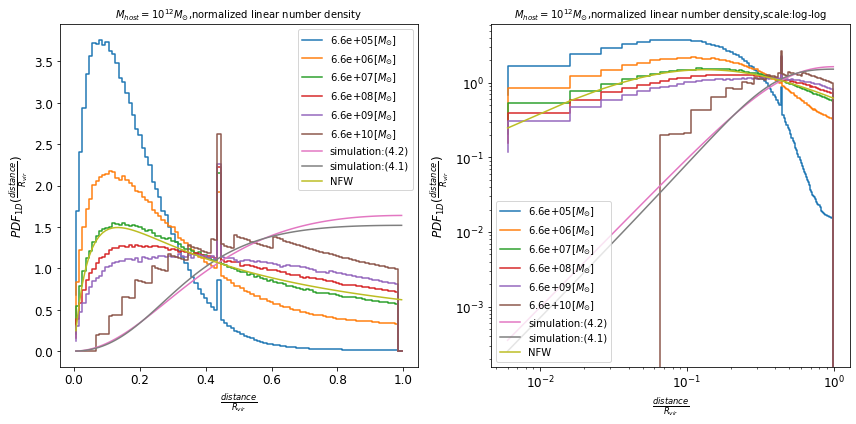

In [17]:
names=[]
logr=False
rmin=0.001
N_r=100
M0=1e12
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+1)
else:
    bins=np.linspace(rmin,1,N_r+1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
for i in range(0,6):
    w=mass_selection(10**(i+5.5),10**(i+6),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    dNdr=NN/dr
    norm=(dNdr*dr).sum()
    ax1.step(radius,dNdr/norm)
    ax2.step(radius,dNdr/norm)
    names.append(str('{:0.1e}'.format((10**(i+5.5)+10**(i+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius))
    ax.plot(radius,Simulation_1(radius))
    ax.plot(radius,sh.radial_weights(radius,M=M0,z=0))

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
names.append("NFW")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()
#plt.savefig('wdm_model_3_r_pdf_zc_0.png')

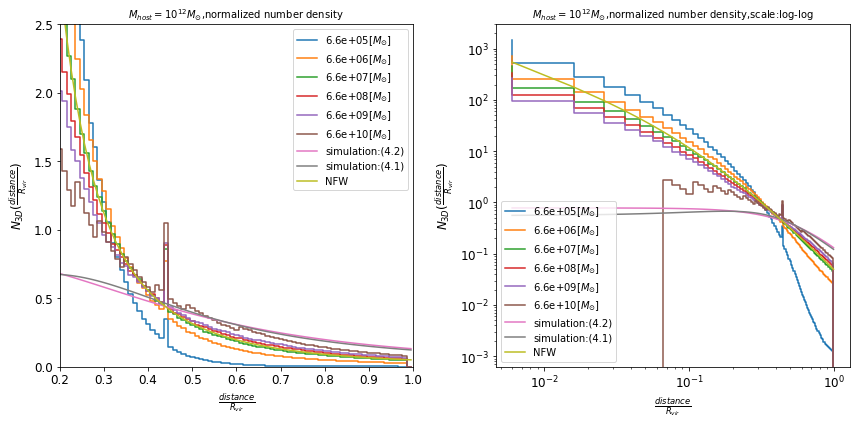

In [18]:
names=[]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density,scale:log-log', fontsize=10)
for i in range(0,6):
    w=mass_selection(10**(i+5.5),10**(i+6),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    dNdr=NN/dr
    norm=(dNdr*dr).sum()
    dNdr=dNdr/norm
    dNdV=dNdr/(4*np.pi*radius**2)
    ax1.step(radius,dNdV)
    ax2.step(radius,dNdV)
    names.append(str('{:0.1e}'.format((10**(i+5.5)+10**(i+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$N_{3D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius)/(4*np.pi*radius**2))
    ax.plot(radius,Simulation_1(radius)/(4*np.pi*radius**2))
    ax.plot(radius,sh.radial_weights(radius,M=M0,z=0)/(4*np.pi*radius**2))

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
names.append("NFW")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,2.5)
plt.tight_layout()
#plt.savefig('wdm_model_3_num_den_zc_0.png')

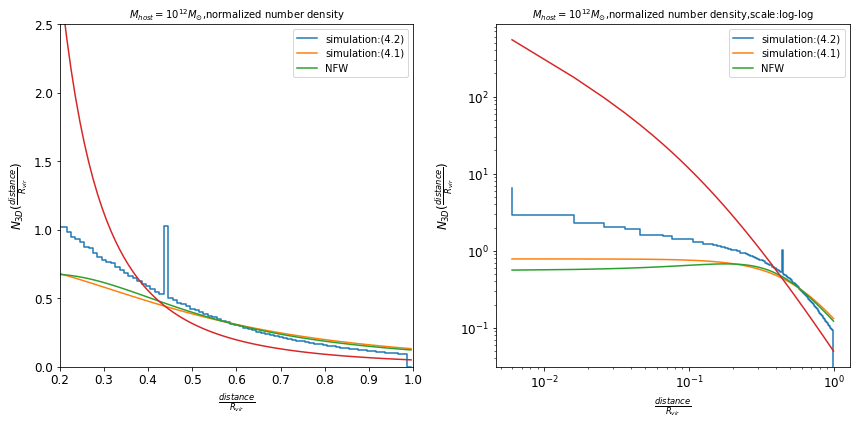

In [30]:
names=[]
if logr==True:
    bins=np.logspace(np.log10(rmin),0,N_r+10)
else:
    bins=np.linspace(rmin,1,N_r+1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density,scale:log-log', fontsize=10)

w=mass_selection(10**(7),10**(12),m0_new)*(z_a_new>2.5)
NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins)
radius=(rr[1:]+rr[:-1])/2.
dr=rr[1:]-rr[:-1]
dNdr=NN/dr
norm=(dNdr*dr).sum()
dNdr=dNdr/norm
dNdV=dNdr/(4*np.pi*radius**2)
ax1.step(radius,dNdV)
ax2.step(radius,dNdV)
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$N_{3D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius)/(4*np.pi*radius**2))
    ax.plot(radius,Simulation_1(radius)/(4*np.pi*radius**2))
    ax.plot(radius,sh.radial_weights(radius,M=M0,z=0)/(4*np.pi*radius**2))

names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
names.append("NFW")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
ax1.set_xlim(0.2,1)
ax1.set_ylim(0,2.5)
plt.tight_layout()
#plt.savefig('wdm_model_3_num_den_zc_7_zacc_25_msh_7.png')